<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-A01793469/blob/main/A01793469_Semana_8_Data_Analysis_with_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Alumno: Alberto Patraca Sotomayor
#Matrícula: A01793469

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/automobileEDA.csv'
df = pd.read_csv(path)
df.head()

,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,3,122,alfa-romero,std,two,convertible,rwd,front,88.6,0.811148,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,1,122,alfa-romero,std,two,hatchback,rwd,front,94.5,0.822681,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,2,164,audi,std,four,sedan,fwd,front,99.8,0.848630,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,2,164,audi,std,four,sedan,4wd,front,99.4,0.848630,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [ ]:
df = df._get_numeric_data()
df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,3,122,88.6,0.811148,0.890278,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,1,122,94.5,0.822681,0.909722,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,2,164,99.8,0.848630,0.919444,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,2,164,99.4,0.848630,0.922222,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [ ]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [ ]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)
    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')
    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height)) 
    xmax=max([xtrain.values.max(), xtest.values.max()])
    xmin=min([xtrain.values.min(), xtest.values.min()])
    x=np.arange(xmin, xmax, 0.1)
    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

In [ ]:
y = df['price']
X = df.drop('price',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.10, random_state=1)
print('Number of test samples: ', X_test.shape[0])
print('number of training samples: ',X_tv.shape[0])

number of test samples : 21
number of training samples: 180


In [15]:
X_tv1, X_test1, y_tv1, y_test1 = train_test_split(X, y, test_size=0.40, random_state=1)
print('Number of test samples: ', X_test1.shape[0])
print('number of training samples: ',X_tv1.shape[0])

Number of test samples:  81
number of training samples:  120


In [16]:
from sklearn.linear_model import LinearRegression

In [19]:
lre=LinearRegression()
lre.fit(X_tv[['horsepower']], y_tv)
lre.score(X_test[['horsepower']], y_test)

0.36358755750788263

In [20]:
lre.score(X_tv[['horsepower']], y_tv)

0.6619724197515104

In [21]:
lr1=LinearRegression()
lr1.fit(X_tv1[['horsepower']], y_tv1)
lr1.score(X_test1[['horsepower']], y_test1)

0.6111827529454426

In [22]:
from sklearn.model_selection import cross_val_score

In [24]:
Rcross = cross_val_score(lre, X[['horsepower']], y, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [25]:
print(f'The mean of the folds are, {Rcross.mean()}, and the standard deviation is, {Rcross.std()}')
-1 * cross_val_score(lr1, X[['horsepower']], y, cv=4, scoring='neg_mean_squared_error')

The mean of the folds are, 0.522009915042119, and the standard deviation is, 0.291183944475603


array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

In [26]:
rc = cross_val_score(lr1, X[['horsepower']], y, cv=2)
rc.mean()

0.5166761697127429

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
yhat = cross_val_predict(lre, X[['horsepower']], y, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [30]:
lr2 = LinearRegression()
lr2.fit(X[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)
yhat_train = lr2.predict(X_tv[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7365.00140105, 28191.0677239 , 14400.66302373,  4006.47212651,
       34470.03895495])

In [31]:
yhat_test = lr2.predict(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11229.17653151,  5799.04215638, 11133.109114  ,  6514.17763926,
       15393.37012355])

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


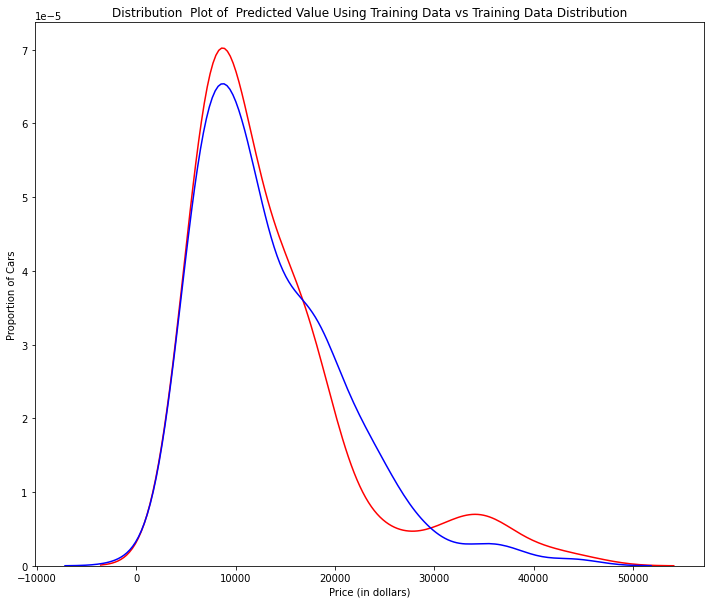

In [33]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_tv, yhat_train, 'Actual Values (Train)', 'Predicted Values (Train)', Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


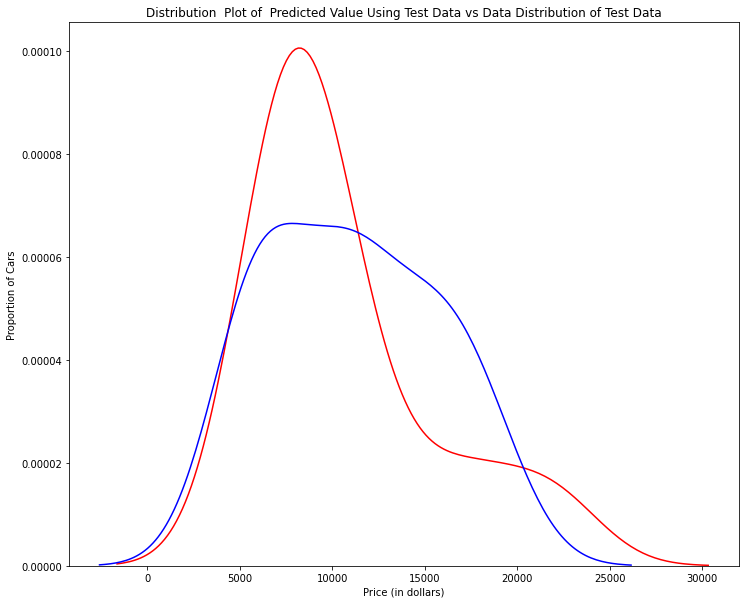

In [34]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

In [35]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X_tv, X_test, y_tv, y_test = train_test_split(X, y, test_size=0.45, random_state=0)
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(X_tv[['horsepower']])
x_test_pr = pr.fit_transform(X_test[['horsepower']])
poly = LinearRegression()
poly.fit(x_train_pr, y_tv)

LinearRegression()

In [38]:
yhat = poly.predict(x_test_pr)
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


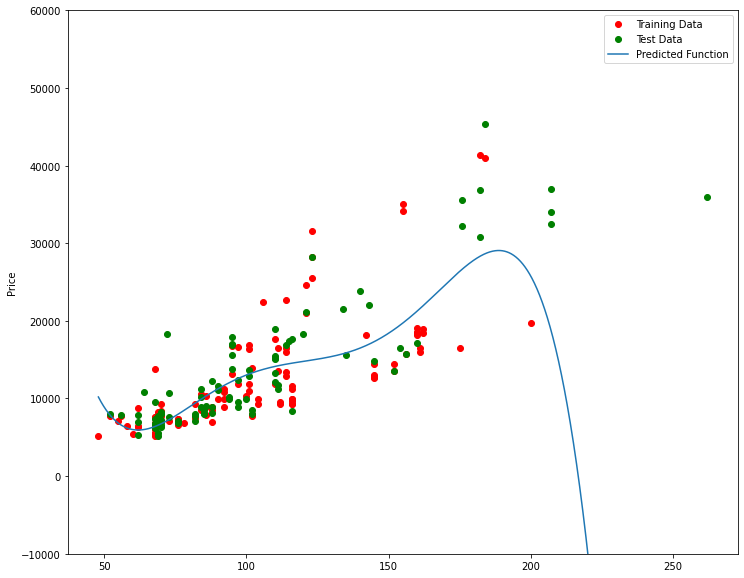

In [40]:
PollyPlot(X_tv[['horsepower']], X_test[['horsepower']], y_tv, y_test, poly, pr)

In [41]:
poly.score(x_train_pr, y_tv)

0.556771690212023

In [42]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

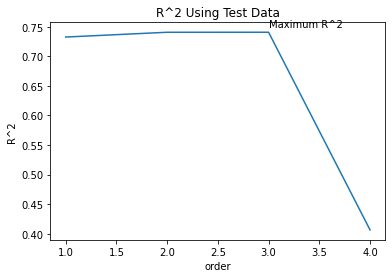

In [43]:
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(X_tv[['horsepower']])
    x_test_pr = pr.fit_transform(X_test[['horsepower']])    
    lr2.fit(x_train_pr, y_tv)
    Rsqu_test.append(lr2.score(x_test_pr, y_test))
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [44]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [45]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

In [46]:
pr1=PolynomialFeatures(degree=2)
x_train_pr1=pr1.fit_transform(X_tv[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_test_pr1=pr1.fit_transform(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
x_train_pr1.shape

(110, 15)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


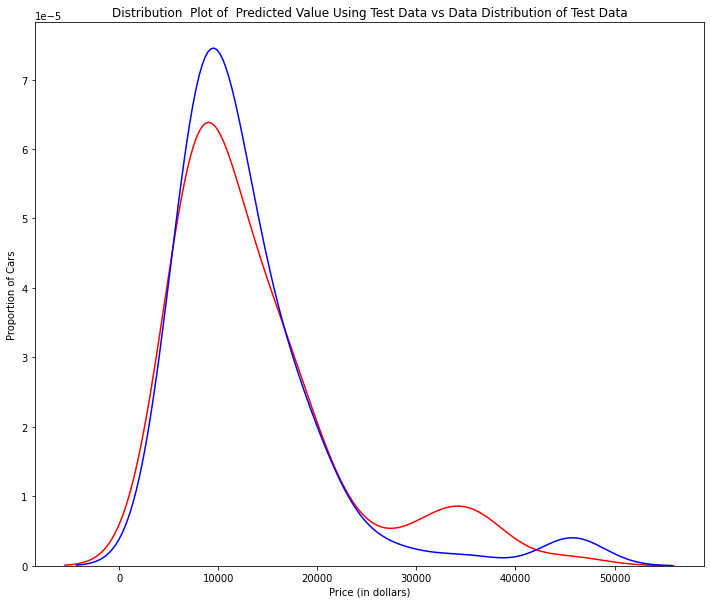

In [47]:
poly1=LinearRegression().fit(x_train_pr1,y_tv)
yhat_test1=poly1.predict(x_test_pr1)
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

In [48]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(X_tv[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [49]:
from sklearn.linear_model import Ridge

In [50]:
RigeModel=Ridge(alpha=1)
RigeModel.fit(x_train_pr, y_tv)
yhat = RigeModel.predict(x_test_pr)
print('Predicted:', yhat[0:4])
print('Test set :', y_test[0:4].values)

Predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
Test set : [ 6295. 10698. 13860. 13499.]


In [51]:
from tqdm import tqdm

In [52]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_tv)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_tv)
    pbar.set_postfix({'Test Score': test_score, 'Train Score': train_score})
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:08<00:00, 111.40it/s, Test Score=0.564, Train Score=0.859]


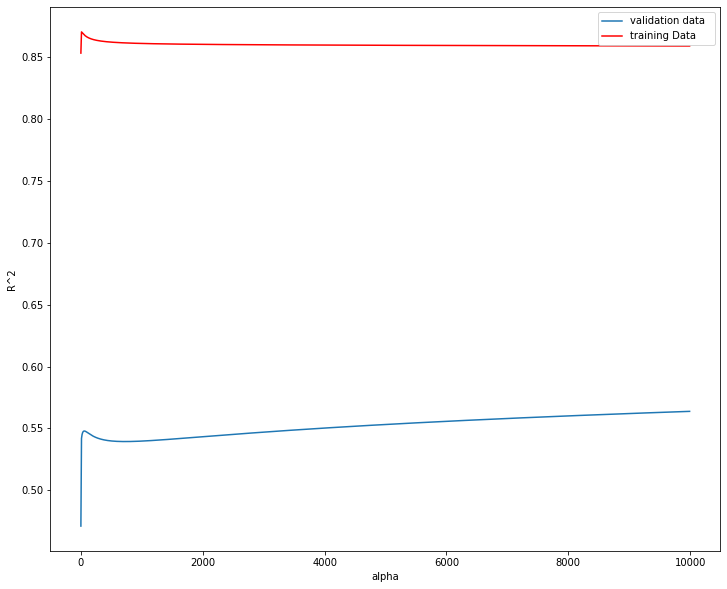

In [53]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [55]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(X[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y)
BestRR = Grid1.best_estimator_

In [58]:
BestRR.score(X_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151